## 1) Installazione librerie e check GPU

In [1]:
# Installo le librerie che mi servono
!pip install ultralytics
!pip install fiftyone
!pip install opencv-python

In [2]:
# Controllo se ho la GPU
!nvidia-smi

Sun Nov 30 16:34:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             41W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

## 2) Import delle librerie

In [3]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import fiftyone as fo
import fiftyone.zoo as foz
from ultralytics import YOLO

print("Librerie importate!")

Librerie importate!


## 3) Download dataset con FiftyOne

Scarico le immagini da OpenImages per le 5 classi di animali.

In [4]:
# Le classi che voglio
classi = ["Horse", "Lizard", "Mouse", "Hamster", "Mule"]

print("Inizio download...")
print("Classi:", classi)

Inizio download...
Classi: ['Horse', 'Lizard', 'Mouse', 'Hamster', 'Mule']


In [5]:
# Scarico il dataset da OpenImages
dataset = foz.load_zoo_dataset(
    "open-images-v7",
    split=None,
    label_types=["detections"],
    classes=classi,
    max_samples=1500,
    seed=42,
    shuffle=True
) # tempo stimato massimo 5 minuti

print("Dataset scaricato!")
print("Numero totale immagini:", len(dataset))

# Guardo quali campi ha il dataset
print("\nCampi del dataset:")
print(dataset.get_field_schema())

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/open-images-v7/train' if necessary


Found 1000 images, downloading the remaining 500


INFO:fiftyone.utils.openimages:Found 1000 images, downloading the remaining 500


 100% |███████████████████| 500/500 [7.8s elapsed, 0s remaining, 70.2 files/s]       


INFO:eta.core.utils: 100% |███████████████████| 500/500 [7.8s elapsed, 0s remaining, 70.2 files/s]       


INFO:fiftyone.zoo.datasets:Downloading split 'test' to '/root/fiftyone/open-images-v7/test' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/test/test-images-with-rotation.csv' to '/root/fiftyone/open-images-v7/test/metadata/image_ids.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/root/fiftyone/open-images-v7/test/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmp7ucjsph1/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/test-annotations-bbox.csv' to '/root/fiftyone/open-images-v7/test/labels/detections.csv'


Only found 1438 (<1500) samples matching your requirements


INFO:fiftyone.utils.openimages:Downloading 1438 images


 100% |████████████████-| 1433/1438 [21.6s elapsed, 78.5ms remaining, 63.7 files/s]  

 100% |█████████████████| 1438/1438 [21.7s elapsed, 0s remaining, 63.4 files/s]      


INFO:eta.core.utils: 100% |█████████████████| 1438/1438 [21.7s elapsed, 0s remaining, 63.4 files/s]      


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/open-images-v7/validation' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/validation/validation-images-with-rotation.csv' to '/root/fiftyone/open-images-v7/validation/metadata/image_ids.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/root/fiftyone/open-images-v7/validation/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmp9zm01uph/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv' to '/root/fiftyone/open-images-v7/validation/labels/detections.csv'


Only found 453 (<1500) samples matching your requirements


INFO:fiftyone.utils.openimages:Downloading 453 images


 100% |███████████████████| 453/453 [6.9s elapsed, 0s remaining, 68.5 files/s]       


INFO:eta.core.utils: 100% |███████████████████| 453/453 [6.9s elapsed, 0s remaining, 68.5 files/s]       


Dataset info written to '/root/fiftyone/open-images-v7/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/open-images-v7/info.json'


Loading 'open-images-v7' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'train'


 100% |███████████████| 1500/1500 [9.5s elapsed, 0s remaining, 162.4 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 1500/1500 [9.5s elapsed, 0s remaining, 162.4 samples/s]       


Loading 'open-images-v7' split 'test'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'test'


 100% |███████████████| 1438/1438 [11.9s elapsed, 0s remaining, 130.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1438/1438 [11.9s elapsed, 0s remaining, 130.3 samples/s]      


Loading 'open-images-v7' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'validation'


 100% |█████████████████| 453/453 [4.0s elapsed, 0s remaining, 125.0 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 453/453 [4.0s elapsed, 0s remaining, 125.0 samples/s]      


Dataset 'open-images-v7-1500' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-1500' created


Dataset scaricato!
Numero totale immagini: 3391

Campi del dataset:
OrderedDict({'id': <fiftyone.core.fields.ObjectIdField object at 0x79b1d9e90680>, 'filepath': <fiftyone.core.fields.StringField object at 0x79b195821f10>, 'tags': <fiftyone.core.fields.ListField object at 0x79b19ab64ef0>, 'metadata': <fiftyone.core.fields.EmbeddedDocumentField object at 0x79b199f1b770>, 'created_at': <fiftyone.core.fields.DateTimeField object at 0x79b1dade17f0>, 'last_modified_at': <fiftyone.core.fields.DateTimeField object at 0x79b196fe1580>, 'ground_truth': <fiftyone.core.fields.EmbeddedDocumentField object at 0x79b199f1b6e0>})


In [6]:
print(dataset.count_values("ground_truth.detections.label"))

{'Tower': 5, 'Hedgehog': 12, 'Cannon': 2, 'Rabbit': 38, 'Barrel': 1, 'Microphone': 1, 'Mixing bowl': 1, 'Hamster': 302, 'Porcupine': 7, 'Clothing': 2304, 'Camel': 4, 'Truck': 3, 'Squirrel': 33, 'Otter': 8, 'Auto part': 7, 'Shorts': 10, 'Animal': 108, 'Sports uniform': 1, 'Mouse': 440, 'Vehicle': 176, 'Woman': 290, 'Human nose': 195, 'Invertebrate': 7, 'Tire': 72, 'Giraffe': 1, 'Desk': 1, 'Car': 130, 'Poster': 6, 'Crocodile': 10, 'Doll': 2, 'Sofa bed': 1, 'Porch': 2, 'Human head': 670, 'Mule': 501, 'Cattle': 108, 'Sports equipment': 124, 'Jacket': 5, 'Flower': 52, 'Human hand': 90, 'Motorcycle': 1, 'Human body': 369, 'Taxi': 1, 'Weapon': 101, 'Computer mouse': 1, 'Bench': 2, 'Goat': 2, 'Zebra': 1, 'Fedora': 21, 'Skunk': 5, 'House': 42, 'Fruit': 1, 'Human ear': 17, 'Cowboy hat': 71, 'Street light': 3, 'Lion': 1, 'Sculpture': 105, 'Canoe': 2, 'Cat': 3, 'Lamp': 1, 'Flag': 20, 'Girl': 81, 'Window': 119, 'Watch': 1, 'Horse': 3581, 'Tie': 1, 'Wheel': 412, 'Kangaroo': 1, 'Reptile': 20, 'Man': 

In [7]:
# Filtro per tenere solo le immagini con le mie classi
# OpenImages usa il campo "ground_truth" invece di "detections"
dataset_filtrato = dataset.filter_labels("ground_truth", fo.ViewField("label").is_in(classi)) # Rimuove le annotazioni che non sono dentro le nostre classi
dataset_filtrato = dataset_filtrato.match(fo.ViewExpression.length(fo.ViewField("ground_truth.detections")) > 0) # Elimina tutte le immagini senza nessuna delle tue classi.

print("Immagini dopo il filtro:", len(dataset_filtrato))

Immagini dopo il filtro: 3391


In [8]:
# Conto quante immagini ho per ogni classe
print("\nImmagini per classe:")
for classe in classi:
    num = len(dataset_filtrato.filter_labels("ground_truth", fo.ViewField("label") == classe))
    print(f"{classe}: {num}")


Immagini per classe:
Horse: 2152
Lizard: 681
Mouse: 361
Hamster: 258
Mule: 284


In [9]:
# Divido il dataset in train/val/test
# 70% train, 15% val, 15% test

tot = len(dataset_filtrato)
n_train = int(tot * 0.7)
n_val = int(tot * 0.15)
n_test = tot - n_train - n_val

print(f"\nTrain: {n_train}")
print(f"Val: {n_val}")
print(f"Test: {n_test}")


Train: 2373
Val: 508
Test: 510


In [10]:
# Prendo gli ID delle immagini e li mescolo
tutti_id = dataset_filtrato.values("id")
random.seed(42)
random.shuffle(tutti_id)

# Divido gli ID
train_ids = tutti_id[:n_train]
val_ids = tutti_id[n_train:n_train+n_val]
test_ids = tutti_id[n_train+n_val:]

print("ID divisi!")

ID divisi!


In [11]:
# Aggiungo i tag train/val/test
dataset_filtrato.untag_samples("train")
dataset_filtrato.untag_samples("val")
dataset_filtrato.untag_samples("test")

dataset_filtrato.select(train_ids).tag_samples("train")
dataset_filtrato.select(val_ids).tag_samples("val")
dataset_filtrato.select(test_ids).tag_samples("test")

print("Tag aggiunti!")

Tag aggiunti!


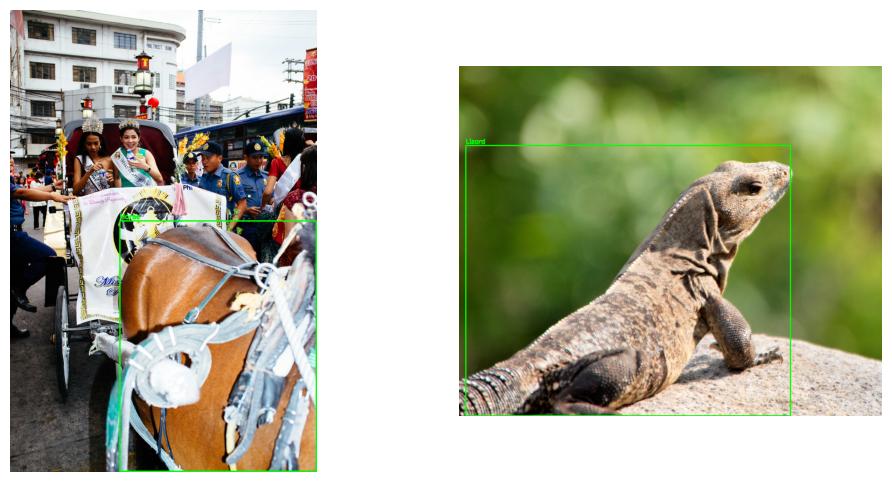

In [12]:
# Mostro 2 immagini di esempio
train_samples = dataset_filtrato.match_tags("train")
sample_list = list(train_samples.take(2))

# Prima immagine
img1 = cv2.imread(sample_list[0].filepath)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
h1, w1 = img1.shape[:2]

# Disegno i bbox sulla prima immagine
for det in sample_list[0].ground_truth.detections:
    bbox = det.bounding_box
    x = int(bbox[0] * w1)
    y = int(bbox[1] * h1)
    w_box = int(bbox[2] * w1)
    h_box = int(bbox[3] * h1)
    cv2.rectangle(img1, (x, y), (x+w_box, y+h_box), (0, 255, 0), 2)
    cv2.putText(img1, det.label, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Seconda immagine
img2 = cv2.imread(sample_list[1].filepath)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
h2, w2 = img2.shape[:2]

# Disegno i bbox sulla seconda immagine
for det in sample_list[1].ground_truth.detections:
    bbox = det.bounding_box
    x = int(bbox[0] * w2)
    y = int(bbox[1] * h2)
    w_box = int(bbox[2] * w2)
    h_box = int(bbox[3] * h2)
    cv2.rectangle(img2, (x, y), (x+w_box, y+h_box), (0, 255, 0), 2)
    cv2.putText(img2, det.label, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Mostro le due immagini
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img1)
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].axis('off')
plt.show()

## 4) Esportazione in formato YOLO

In [13]:
# Esporto in formato YOLO
export_path = "/content/dataset_yolo"

print("Esporto train...")
train_view = dataset_filtrato.match_tags("train")
train_view.export(
    export_dir=export_path + "/train",
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
    classes=classi
)

print("Esporto val...")
val_view = dataset_filtrato.match_tags("val")
val_view.export(
    export_dir=export_path + "/val",
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
    classes=classi
)

print("Esporto test...")
test_view = dataset_filtrato.match_tags("test")
test_view.export(
    export_dir=export_path + "/test",
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
    classes=classi
)

print("Tutto esportato!")

Esporto train...
Directory '/content/dataset_yolo/train' already exists; export will be merged with existing files


 100% |███████████████| 2373/2373 [3.7s elapsed, 0s remaining, 715.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2373/2373 [3.7s elapsed, 0s remaining, 715.0 samples/s]      


Esporto val...
Directory '/content/dataset_yolo/val' already exists; export will be merged with existing files


 100% |█████████████████| 508/508 [795.9ms elapsed, 0s remaining, 638.3 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 508/508 [795.9ms elapsed, 0s remaining, 638.3 samples/s]      


Esporto test...
Directory '/content/dataset_yolo/test' already exists; export will be merged with existing files


 100% |█████████████████| 510/510 [747.8ms elapsed, 0s remaining, 682.0 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 510/510 [747.8ms elapsed, 0s remaining, 682.0 samples/s]      


Tutto esportato!


In [14]:
# Guardo la struttura delle cartelle
!ls -lh /content/dataset_yolo/train/
!ls -lh /content/dataset_yolo/val/
!ls -lh /content/dataset_yolo/test/

total 12K
-rw-r--r-- 1 root root  117 Nov 30 16:38 dataset.yaml
drwxr-xr-x 3 root root 4.0K Nov 30 15:49 images
drwxr-xr-x 3 root root 4.0K Nov 30 15:49 labels
total 12K
-rw-r--r-- 1 root root  115 Nov 30 16:38 dataset.yaml
drwxr-xr-x 3 root root 4.0K Nov 30 15:49 images
drwxr-xr-x 3 root root 4.0K Nov 30 15:49 labels
total 12K
-rw-r--r-- 1 root root  116 Nov 30 16:38 dataset.yaml
drwxr-xr-x 3 root root 4.0K Nov 30 15:49 images
drwxr-xr-x 3 root root 4.0K Nov 30 15:51 labels


In [15]:
# Creo il file data.yaml per YOLO
yaml_content = f"""path: {export_path}
train: train/images
val: val/images
test: test/images

nc: {len(classi)}
names: {classi}
"""

yaml_file = export_path + "/data.yaml"
with open(yaml_file, 'w') as f:
    f.write(yaml_content)

print("File data.yaml creato!")
print(yaml_content)

File data.yaml creato!
path: /content/dataset_yolo
train: train/images
val: val/images
test: test/images

nc: 5
names: ['Horse', 'Lizard', 'Mouse', 'Hamster', 'Mule']



## 5) Caricamento modello YOLO

Uso yolov8n perche e piccolo e veloce.

In [16]:
# Carico il modello pretrainato
model = YOLO("yolo11s.pt")

print("Modello caricato!")

Modello caricato!


## 6) Training

Faccio il training per 15 epoche.

In [17]:
# Parametri
epoche = 50
img_size = 640
batch = 16

print(f"Inizio training con {epoche} epoche...")

Inizio training con 50 epoche...


In [18]:
# Faccio il training
risultati = model.train(
    data=yaml_file,
    epochs=epoche,
    imgsz=img_size,
    batch=batch,
    project="/content/yolo_train",
    name="animali",
    seed=42
)

print("Training finito!") # impiega 20min

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_yolo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=animali4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

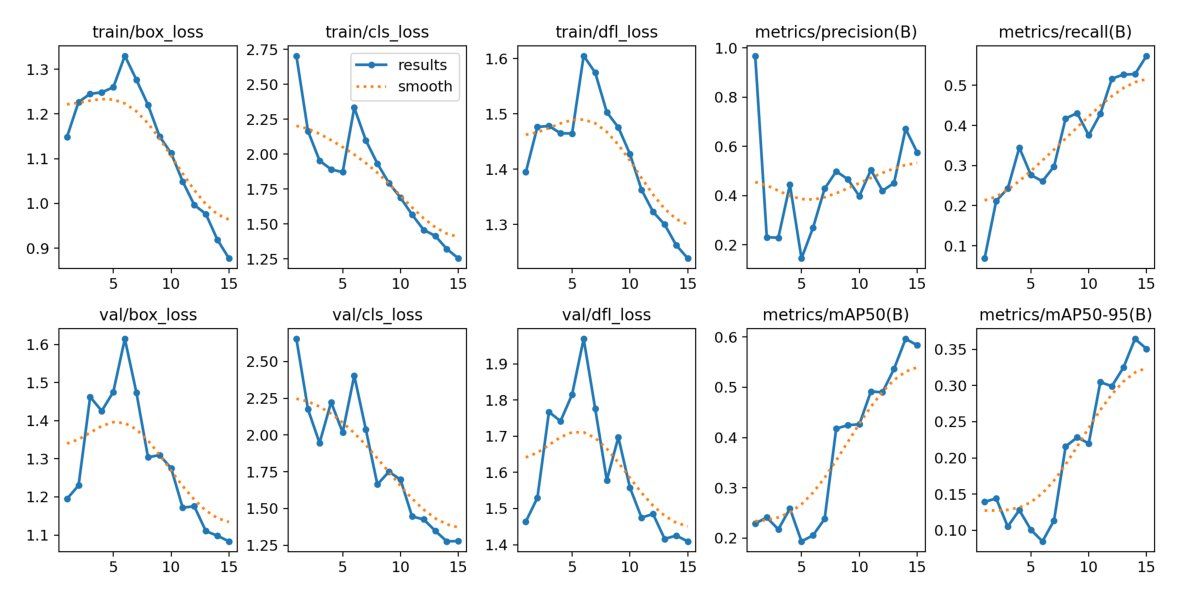

In [19]:
# Guardo i grafici del training
img_risultati = "/content/yolo_train/animali/results.png"


img = plt.imread(img_risultati)
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
# Carico il modello migliore
best_model = YOLO("/content/yolo_train/animali/weights/best.pt")
print("Modello migliore caricato!")

Modello migliore caricato!


## 7) Valutazione sul test set

In [21]:
# Valuto sul test
print("Valuto sul test set...")
metriche = best_model.val(data=yaml_file, split="test")

print("\nRISULTATI TEST SET")
print("="*40)
print(f"mAP@0.5: {metriche.box.map50}")
print(f"mAP@0.5:0.95: {metriche.box.map}")
print(f"Precision: {metriche.box.mp}")
print(f"Recall: {metriche.box.mr}")

Valuto sul test set...
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2784.7±464.3 MB/s, size: 507.5 KB)
val: Scanning /content/dataset_yolo/test/labels/val... 639 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 639/639 1.5Kit/s 0.4s
val: New cache created: /content/dataset_yolo/test/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 40/40 9.0it/s 4.4s
                   all        639       1034       0.59      0.565      0.567      0.339
                 Horse        419        695      0.641      0.754      0.736      0.532
                Lizard        140        153      0.706      0.791      0.823       0.47
                 Mouse         48         64      0.647      0.609      0.573      0.297
               Hamster         3

## 8) Inferenza sul test set

Provo il modello su alcune immagini del test.

In [22]:
# Prendo le immagini del test e seleziono 1 per ogni classe
test_img_folder = "/content/dataset_yolo/test/images/val"

print(f"Cerco immagini in: {test_img_folder}\n")

# Prendo tutti i file
tutti_file = os.listdir(test_img_folder)
test_imgs = []
for f in tutti_file:
    if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png'):
        test_imgs.append(f)

print(f"Trovate {len(test_imgs)} immagini totali")

# Per ogni classe, cerco un'immagine nel test set
# Devo guardare le label per trovare le immagini giuste
test_view = dataset_filtrato.match_tags("test")

img_da_testare = []
classi_trovate = []

print(f"\nCerco 1 immagine per ogni classe:")
for classe in classi:
    # Filtro per questa classe
    samples_classe = test_view.filter_labels("ground_truth", fo.ViewField("label") == classe)

    if len(samples_classe) > 0:
        # Prendo la prima immagine
        sample = samples_classe.first()
        img_name = os.path.basename(sample.filepath)
        img_da_testare.append(img_name)
        classi_trovate.append(classe)
        print(f"  {classe}: {img_name}")
    else:
        print(f"  {classe}: NON TROVATA nel test set")

print(f"\nTrovate {len(img_da_testare)} immagini")

# Faccio inferenza
print(f"\nFaccio inferenza...")
predizioni = []
for img_name in img_da_testare:
    img_path = os.path.join(test_img_folder, img_name)
    risultato = best_model(img_path)
    predizioni.append(risultato[0])

print(f"Inferenza completata!")

Cerco immagini in: /content/dataset_yolo/test/images/val

Trovate 639 immagini totali

Cerco 1 immagine per ogni classe:
  Horse: 2f58e616de091015.jpg
  Lizard: 70dc7d9c2e2ca781.jpg
  Mouse: d665d1fb73006bd2.jpg
  Hamster: cd6605bc87398079.jpg
  Mule: f899c5a7add0e994.jpg

Trovate 5 immagini

Faccio inferenza...

image 1/1 /content/dataset_yolo/test/images/val/2f58e616de091015.jpg: 640x512 4 Horses, 64.1ms
Speed: 2.6ms preprocess, 64.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /content/dataset_yolo/test/images/val/70dc7d9c2e2ca781.jpg: 448x640 1 Lizard, 71.6ms
Speed: 2.5ms preprocess, 71.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/dataset_yolo/test/images/val/d665d1fb73006bd2.jpg: 352x640 1 Mouse, 1 Hamster, 63.8ms
Speed: 1.9ms preprocess, 63.8ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 /content/dataset_yolo/test/images/val/cd6605bc87398079.jpg: 448x640 1 Mouse, 1 Hamster

In [23]:
# Prendo le immagini del test
# L'esportazione crea images/val/ invece di solo images/
test_img_folder = "/content/dataset_yolo/test/images/val"

print(f"Cerco le immagini in: {test_img_folder}")

if not os.path.exists(test_img_folder):
    print("ERRORE: Cartella non trovata!")
else:
    tutti_file = os.listdir(test_img_folder)
    print(f"File trovati: {len(tutti_file)}")

    # Filtro solo i file immagine
    test_imgs = []
    for f in tutti_file:
        if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png'):
            test_imgs.append(f)

    print(f"Immagini nel test: {len(test_imgs)}")

Cerco le immagini in: /content/dataset_yolo/test/images/val
File trovati: 639
Immagini nel test: 639



Mostro 5 immagini (1 per classe):

Immagine 1: 2f58e616de091015.jpg
  Ground Truth: Horse
  Dimensioni immagine: 768x1004
  Numero predizioni: 4
    Box 1: Horse conf=0.96 coords=(393,815,449,884)
    Box 2: Horse conf=0.86 coords=(80,1,761,479)
    Box 3: Horse conf=0.51 coords=(344,823,403,876)
    Box 4: Horse conf=0.32 coords=(347,823,399,858)


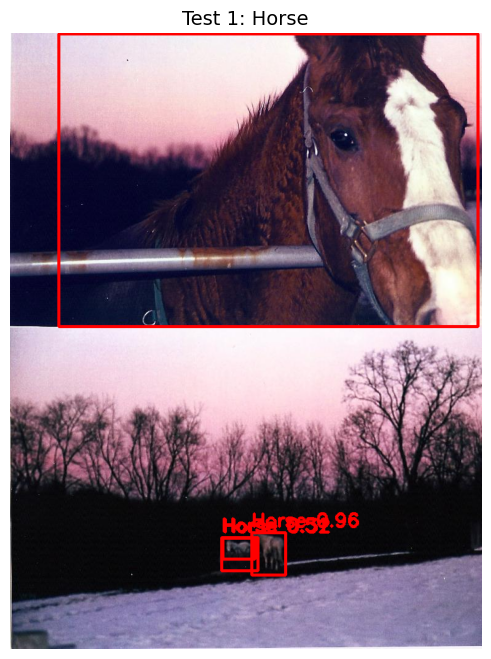


Immagine 2: 70dc7d9c2e2ca781.jpg
  Ground Truth: Lizard
  Dimensioni immagine: 1024x681
  Numero predizioni: 1
    Box 1: Lizard conf=0.72 coords=(19,154,750,486)


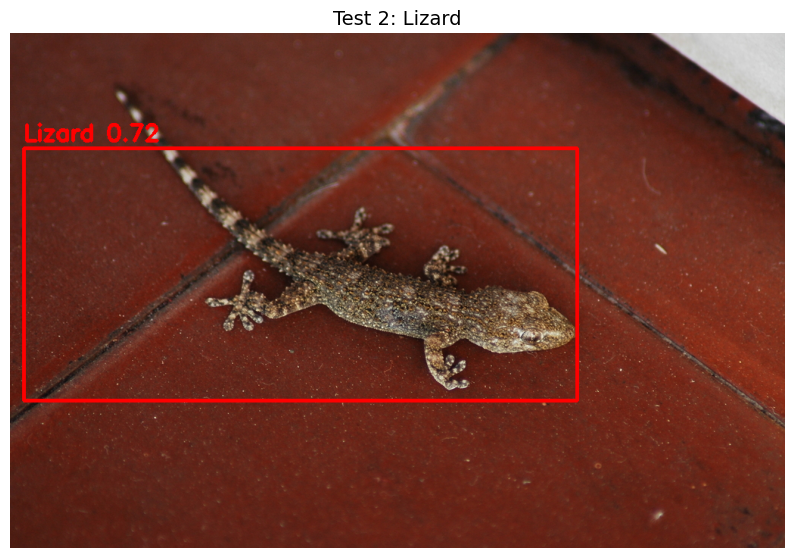


Immagine 3: d665d1fb73006bd2.jpg
  Ground Truth: Mouse
  Dimensioni immagine: 1024x560
  Numero predizioni: 2
    Box 1: Mouse conf=0.44 coords=(271,189,1002,508)
    Box 2: Hamster conf=0.31 coords=(312,190,1019,506)


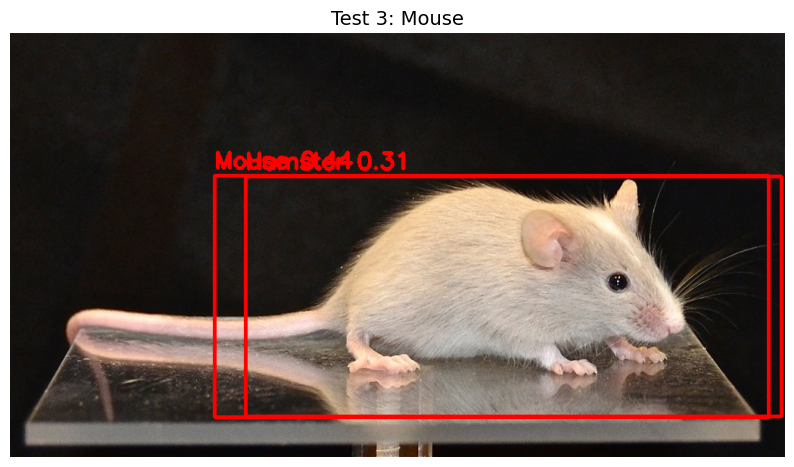


Immagine 4: cd6605bc87398079.jpg
  Ground Truth: Hamster
  Dimensioni immagine: 1024x683
  Numero predizioni: 2
    Box 1: Mouse conf=0.64 coords=(443,185,687,432)
    Box 2: Hamster conf=0.60 coords=(441,186,687,434)


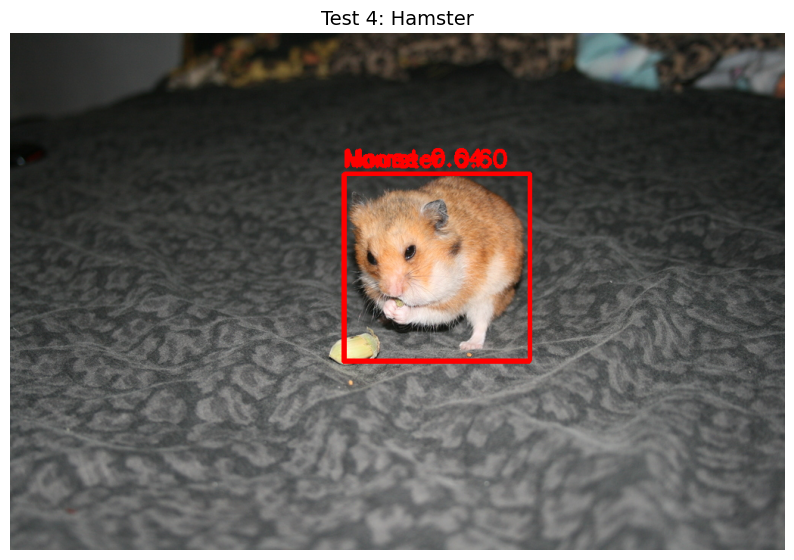


Immagine 5: f899c5a7add0e994.jpg
  Ground Truth: Mule
  Dimensioni immagine: 846x1024
  Numero predizioni: 2
    Box 1: Horse conf=0.69 coords=(329,439,599,1021)
    Box 2: Horse conf=0.48 coords=(787,738,837,800)


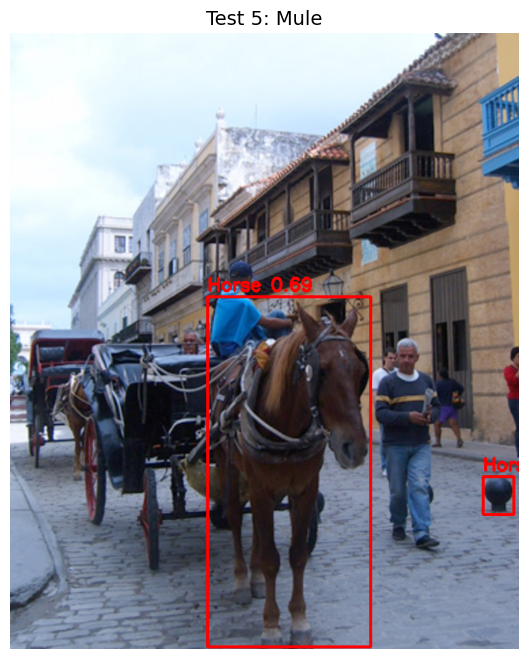

In [24]:
# Mostro le immagini con le predizioni
print(f"\nMostro {len(img_da_testare)} immagini (1 per classe):\n")

for i in range(len(img_da_testare)):
    img_path = os.path.join(test_img_folder, img_da_testare[i])
    classe_gt = classi_trovate[i]

    print(f"Immagine {i+1}: {img_da_testare[i]}")
    print(f"  Ground Truth: {classe_gt}")

    # DEBUG: verifico se il file esiste
    if not os.path.exists(img_path):
        print(f"  ERRORE: file non trovato: {img_path}\n")
        continue

    img = cv2.imread(img_path)
    if img is None:
        print("  ERRORE caricamento\n")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    print(f"  Dimensioni immagine: {w}x{h}")

    pred = predizioni[i]
    boxes = pred.boxes

    # DEBUG: stampo info dettagliate
    print(f"  Numero predizioni: {len(boxes)}")
    if len(boxes) == 0:
        print("  ATTENZIONE: Nessun oggetto rilevato!")

    # Disegno bbox
    for j, box in enumerate(boxes):
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        conf = box.conf[0].cpu().numpy()
        cls = int(box.cls[0].cpu().numpy())
        label = classi[cls]

        print(f"    Box {j+1}: {label} conf={conf:.2f} coords=({x1:.0f},{y1:.0f},{x2:.0f},{y2:.0f})")

        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 4)
        cv2.putText(img, f"{label} {conf:.2f}", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 3)

    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Test {i+1}: {classe_gt}", fontsize=14)
    plt.show()
    print()

In [25]:
# Stampo i dettagli delle predizioni
print("Dettagli predizioni:\n")

for i in range(len(img_da_testare)):
    print(f"Immagine {i+1}: {img_da_testare[i]}")

    pred = predizioni[i]
    boxes = pred.boxes

    if len(boxes) == 0:
        print("  Nessun oggetto trovato\n")
    else:
        for j, box in enumerate(boxes):
            conf = box.conf[0].cpu().numpy()
            cls = int(box.cls[0].cpu().numpy())
            label = classi[cls]
            print(f"  Oggetto {j+1}: {label} (confidence: {conf:.3f})")
        print()

Dettagli predizioni:

Immagine 1: 2f58e616de091015.jpg
  Oggetto 1: Horse (confidence: 0.965)
  Oggetto 2: Horse (confidence: 0.860)
  Oggetto 3: Horse (confidence: 0.505)
  Oggetto 4: Horse (confidence: 0.325)

Immagine 2: 70dc7d9c2e2ca781.jpg
  Oggetto 1: Lizard (confidence: 0.719)

Immagine 3: d665d1fb73006bd2.jpg
  Oggetto 1: Mouse (confidence: 0.437)
  Oggetto 2: Hamster (confidence: 0.309)

Immagine 4: cd6605bc87398079.jpg
  Oggetto 1: Mouse (confidence: 0.640)
  Oggetto 2: Hamster (confidence: 0.602)

Immagine 5: f899c5a7add0e994.jpg
  Oggetto 1: Horse (confidence: 0.694)
  Oggetto 2: Horse (confidence: 0.477)



## 9) BONUS - Modello HuggingFace

Provo un modello di object detection da HuggingFace e lo confronto con YOLO.

In [26]:
# Installo transformers
!pip install transformers

In [27]:
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import torch

print("Librerie importate!")

Librerie importate!


In [28]:
# Carico DETR
print("Carico DETR...")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
detr = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# Metto su GPU se c'e
device = "cuda" if torch.cuda.is_available() else "cpu"
detr = detr.to(device)

print(f"DETR caricato su {device}!")

Carico DETR...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.wei

DETR caricato su cuda!


In [29]:
# DETR e addestrato su COCO, che ha solo horse e mouse delle nostre classi
print("DETR riconosce solo Horse e Mouse (sono nel dataset COCO)")
print("Non riconosce Lizard, Hamster, Mule")

DETR riconosce solo Horse e Mouse (sono nel dataset COCO)
Non riconosce Lizard, Hamster, Mule


In [30]:
# Provo DETR su 3 immagini
img_per_detr = img_da_testare[:3]

detr_preds = []

for img_name in img_per_detr:
    img_path = os.path.join(test_img_folder, img_name)
    image = Image.open(img_path)

    inputs = processor(images=image, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = detr(**inputs)

    target_sizes = torch.tensor([image.size[::-1]]).to(device)
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.5)[0]

    detr_preds.append(results)

print("Inferenza DETR completata!")

Inferenza DETR completata!


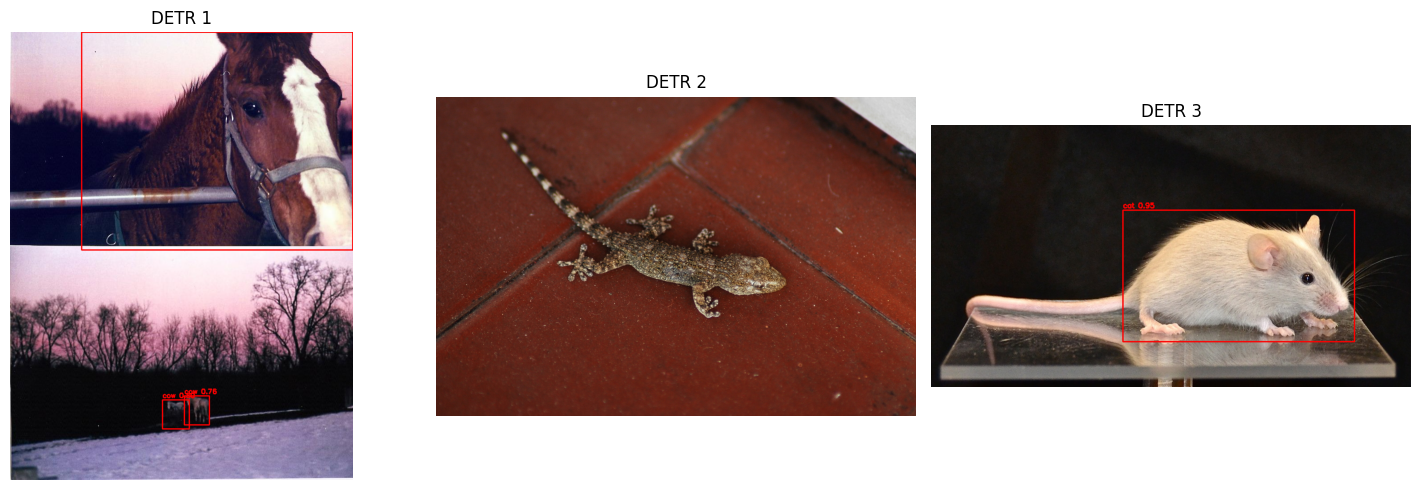

In [31]:
# Mostro i risultati di DETR
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    img_path = os.path.join(test_img_folder, img_per_detr[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = detr_preds[i]

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = box.cpu().numpy()
        x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])

        label_name = detr.config.id2label[label.item()]

        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, f"{label_name} {score:.2f}", (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"DETR {i+1}")

plt.tight_layout()
plt.show()

In [32]:
# Confronto YOLO vs DETR
print("\nCONFRONTO YOLO vs DETR")
print("="*40)
print("\nYOLO (fine-tuned):")
print("  - Riconosce tutte e 5 le classi")
print("  - mAP@0.5 sul test:", metriche.box.map50)
print("  - Veloce")
print("\nDETR (pre-trained su COCO):")
print("  - Riconosce solo Horse e Mouse")
print("  - Non addestrato sulle nostre classi")
print("  - Piu lento")
print("\nCONCLUSIONE: YOLO e meglio per questo task perche l'ho addestrato sulle mie classi!")


CONFRONTO YOLO vs DETR

YOLO (fine-tuned):
  - Riconosce tutte e 5 le classi
  - mAP@0.5 sul test: 0.5673024194894044
  - Veloce

DETR (pre-trained su COCO):
  - Riconosce solo Horse e Mouse
  - Non addestrato sulle nostre classi
  - Piu lento

CONCLUSIONE: YOLO e meglio per questo task perche l'ho addestrato sulle mie classi!


## 10) Conclusione

Ho fatto un progetto di object detection con YOLO per riconoscere 5 animali.

Il modello YOLO fine-tuned funziona bene e riconosce tutte le classi.

DETR e un modello potente ma non e addestrato sulle nostre classi quindi non funziona bene.

Per migliorare potrei:
- Fare piu epoche di training
- Usare un modello YOLO piu grande
- Scaricare piu immagini

Il test set ha circa 100 immagini quindi e abbastanza per valutare il modello.